# Advanced Data Cleaning part I


## Import the appropriate libraries

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

## Read the dataset and explore the datatypes

Notice that many columns aren't in the form that we want, also some columns aren't the correct datatype also

In [24]:
df = pd.read_csv('igbd_dataset.csv', low_memory = False)
df.head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,"""TerraNova:StrikeForceCentauri""",13,825984000.0,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,"""https://www.igdb.com/games/terra-nova-strike-...",92.0,1.0
1,40104.0,"""DogouSouken""",52,536457600.0,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,"""https://www.igdb.com/games/dogou-souken""",NaN,NaN


In [25]:
df.shape

(135063, 16)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135063 entries, 0 to 135062
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       135062 non-null  float64
 1   name                     135061 non-null  object 
 2   platforms                75337 non-null   object 
 3   first_release_date       73294 non-null   float64
 4   category                 135062 non-null  float64
 5   genres                   92472 non-null   object 
 6   themes                   59622 non-null   object 
 7   player_perspectives      36100 non-null   object 
 8   rating                   31303 non-null   object 
 9   rating_count             31300 non-null   float64
 10  similar_games            99347 non-null   object 
 11  total_rating             31300 non-null   float64
 12  total_rating_count       31300 non-null   float64
 13  url                      135061 non-null  object 
 14  aggr

In [27]:
df.describe()

,id,first_release_date,category,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count
count,135062.000000,7.329400e+04,135062.000000,31300.000000,31300.000000,31300.00000,13124.000000,13124.000000
mean,70664.254972,1.228842e+09,0.081777,13.901086,66.132921,15.26885,68.438922,3.680204
std,40694.453733,3.468703e+08,0.534446,75.022597,14.886746,76.43429,16.351182,4.136703
min,1.000000,-6.943968e+08,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35540.250000,9.851328e+08,0.000000,0.000000,57.500000,0.00000,60.000000,1.000000
50%,70690.500000,1.382659e+09,0.000000,1.000000,70.000000,1.00000,70.000000,2.000000
75%,105830.750000,1.499386e+09,0.000000,5.000000,77.500000,6.00000,80.000000,4.000000
max,141114.000000,1.735603e+09,7.000000,2783.000000,100.000000,2817.00000,100.000000,60.000000


# Preprocess the dataset

## Preprocess Name and url
Notice that the **name** column and the **url** column contain ' " '-double quotes- that remained from the downloading and the parsing of the dataset. Remove those double quotes

In [28]:
df['name'].replace(to_replace='^"',value='', inplace=True, regex=True)
df['name'].replace(to_replace='"$',value='', inplace=True, regex=True)

df['url'].replace(to_replace='^"',value='', inplace=True, regex=True)
df['url'].replace(to_replace='"$',value='', inplace=True, regex=True)
df.head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,TerraNova:StrikeForceCentauri,13,825984000.0,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0
1,40104.0,DogouSouken,52,536457600.0,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN


## Preprocess Date
We only want only games that have a date, delete entries that don't have a date or negative date

In [29]:
df.drop(df[df['first_release_date'] < 0].index, inplace=True)

### Split the date column to month and year and insert it into new columns

Tip: You can use the **datetime** function or calculate it by hand (**not recommended**)


In [30]:
# convert first_release_date to datetime
df['first_release_date'] = pd.to_datetime(df['first_release_date'], unit='s')
df.head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0
1,40104.0,DogouSouken,52,1987-01-01,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135052 entries, 0 to 135062
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       135051 non-null  float64       
 1   name                     135050 non-null  object        
 2   platforms                75326 non-null   object        
 3   first_release_date       73283 non-null   datetime64[ns]
 4   category                 135051 non-null  float64       
 5   genres                   92461 non-null   object        
 6   themes                   59614 non-null   object        
 7   player_perspectives      36097 non-null   object        
 8   rating                   31301 non-null   object        
 9   rating_count             31298 non-null   float64       
 10  similar_games            99336 non-null   object        
 11  total_rating             31298 non-null   float64       
 12  total_rating_cou

In [32]:
df.describe()

,id,category,rating_count,total_rating,total_rating_count,aggregated_rating,aggregated_rating_count
count,135051.000000,135051.000000,31298.000000,31298.000000,31298.000000,13123.000000,13123.000000
mean,70667.545772,0.081784,13.901815,66.132195,15.269666,68.438803,3.680408
std,40692.952776,0.534467,75.024938,14.886824,76.436663,16.351799,4.136794
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35545.500000,0.000000,0.000000,57.500000,0.000000,60.000000,1.000000
50%,70694.000000,0.000000,1.000000,70.000000,1.000000,70.000000,2.000000
75%,105832.500000,0.000000,5.000000,77.500000,6.000000,80.000000,4.000000
max,141114.000000,7.000000,2783.000000,100.000000,2817.000000,100.000000,60.000000


In [33]:
df['year'] = df['first_release_date'].dt.year
df['month'] = df['first_release_date'].dt.month

In [34]:
df.head(2)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
0,70.0,TerraNova:StrikeForceCentauri,13,1996-03-05,0.0,"5,13,15","1,18",1,70.0,2.0,"13200,16806,17130,24620,25311,34823,55038,6828...",81.0,3.0,https://www.igdb.com/games/terra-nova-strike-f...,92.0,1.0,1996.0,3.0
1,40104.0,DogouSouken,52,1987-01-01,0.0,5,NaN,NaN,NaN,NaN,"12364,27270,43367,103281,103292,103298,103301,...",NaN,NaN,https://www.igdb.com/games/dogou-souken,NaN,NaN,1987.0,1.0


In [38]:
#Let's check if 'ratings' has anything other than float values and nan's
df[df['rating'].str.contains('.*[a-zA-Z].*') == True]

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
7736,73332.0,DekoratingBlues,NaN,NaT,0.0,"9,15",NaN,NaN,"ues""",NaN,"17613,19404,23345,25222,36346,36553,55036,5559...",NaN,NaN,https://www.igdb.com/games/dekorating-blues,NaN,NaN,NaN,NaN
52131,30686.0,B.BraunFutureOperatingRoom,6,2016-12-09,0.0,13,NaN,NaN,"om""",NaN,"36258,79134,87485,101573,105264,106008,112754,...",NaN,NaN,https://www.igdb.com/games/b-braun-future-oper...,NaN,NaN,2016.0,12.0
56511,20245.0,Haunt,12,2012-01-18,0.0,NaN,19,1,"ount"":3",3.0,"520,25646,27266,55282,99307,103295,103298,1107...",73.333333,3.0,https://www.igdb.com/games/haunt,73.333333,3.0,2012.0,1.0
86681,100868.0,DreamDollHouse-DecoratingGame,NaN,NaT,0.0,NaN,NaN,NaN,"me""",NaN,NaN,NaN,NaN,https://www.igdb.com/games/dream-doll-house-de...,NaN,NaN,NaN,NaN
97822,5089.0,Pac-ManParty,"5,37",2010-11-16,0.0,NaN,"1,40",2,"ount"":4",4.0,"6874,19082,28113,28213,37016,54774,113113,1152...",65.333333,4.0,https://www.igdb.com/games/pac-man-party,65.333333,4.0,2010.0,11.0
110217,26762.0,1-2-Switch,130,2017-03-03,0.0,NaN,40,"5,6","ount"":10",10.0,"5312,19082,19083,27927,28113,28213,54774,68925...",46.906003,23.0,https://www.igdb.com/games/1-2-switch,53.666667,10.0,2017.0,3.0


In [ ]:
#If we wanted to find our "wrong" values and then drop them, we could do this
#to_drop = df[df['rating'].str.contains('.*[a-zA-Z].*')==True]
#df.drop(to_drop.index, axis = 0, inplace = True)

In [39]:
df['rating'] = pd.to_numeric(df['rating'], errors = 'coerce')

In [41]:
#just for checking purposes
df['rating'][7736]

nan

# 1. What’s the first game ever released and when?


In [42]:
df.sort_values('first_release_date', inplace=True)
df.head(1)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month
82269,56115.0,JetRocket,52,1970-06-30,0.0,5,1,1,NaN,NaN,"8559,10964,11171,15536,28751,57217,58075,64311...",NaN,NaN,https://www.igdb.com/games/jet-rocket,NaN,NaN,1970.0,6.0


# 2. Which are the top 5 games of all time? (tip: many games score 100 rating and have a few reviews, other games score a bit lower but much higher reviews...)

In [46]:
df.drop(df[df['rating_count'] == 0].index, inplace=True)

In [44]:
df['weighted_score'] = df['rating'] * df['rating_count']

In [45]:
df.head()

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score
82269,56115.0,JetRocket,52,1970-06-30,0.0,5,1,1,NaN,NaN,"8559,10964,11171,15536,28751,57217,58075,64311...",NaN,NaN,https://www.igdb.com/games/jet-rocket,NaN,NaN,1970.0,6.0,NaN
90255,11304.0,Highnoon,"82,107",1970-12-31,0.0,NaN,1,5,NaN,NaN,"58867,100800,103301,105049,111130,112589,11389...",NaN,NaN,https://www.igdb.com/games/highnoon,NaN,NaN,1970.0,12.0,NaN
12078,11396.0,GalaxyGame,108,1971-09-01,0.0,5,18,3,NaN,NaN,"38030,55038,57187,68286,68287,78770,103281,105...",NaN,NaN,https://www.igdb.com/games/galaxy-game,NaN,NaN,1971.0,9.0,NaN
107254,11245.0,ComputerSpace,52,1971-11-01,0.0,"5,33",18,4,NaN,NaN,"17111,17130,55038,57187,68286,68287,78770,1052...",NaN,NaN,https://www.igdb.com/games/computer-space,NaN,NaN,1971.0,11.0,NaN
69032,11325.0,TheOregonTrail,"104,109",1971-12-03,0.0,"13,15,31","22,34",5,79.875319,18.0,"9789,20776,24765,29173,35371,36346,51945,55036...",79.875319,18.0,https://www.igdb.com/games/the-oregon-trail,NaN,NaN,1971.0,12.0,1437.75575


In [50]:
df['normalized_weighted_score'] = (df['weighted_score'] - df['weighted_score'].min())/(df['weighted_score'].max() - df['weighted_score'].min()) * 100

In [51]:
df.sort_values('normalized_weighted_score',ascending=False, inplace=True)

In [53]:
df.head(5)

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
76901,1020.0,GrandTheftAutoV,"6,9,12,48,49",2013-09-17,0.0,"5,10,14,31","1,27,33,38","1,2",91.007003,2783.0,"40,109,733,960,1121,1377,3188,3262,19441",93.423502,2817.0,https://www.igdb.com/games/grand-theft-auto-v,95.840000,34.0,2013.0,9.0,253272.490450,100.000000
89699,1942.0,TheWitcher3:WildHunt,"6,48,49",2015-05-19,0.0,"12,31","1,17,38",2,95.708657,2468.0,"121,472,533,1334,1593,1887,3025,9938,11270",93.714329,2494.0,https://www.igdb.com/games/the-witcher-3-wild-...,91.720000,26.0,2015.0,5.0,236208.966262,93.262780
133848,72.0,Portal2,"3,6,9,12,14",2011-04-19,0.0,"5,8,9,31","1,18,27",1,91.331534,2116.0,"7350,11646,16992,20342,22387,24426,55173,55190...",91.887989,2129.0,https://www.igdb.com/games/portal-2,92.444444,13.0,2011.0,4.0,193257.526516,76.304192
68308,472.0,TheElderScrollsV:Skyrim,"6,9,12",2011-11-11,0.0,"12,31","1,17,33,38","1,2",87.714979,2184.0,"56,59,121,533,538,832,1081,1942,3025",91.913045,2196.0,https://www.igdb.com/games/the-elder-scrolls-v...,96.111111,12.0,2011.0,11.0,191569.514797,75.637711
132155,1009.0,TheLastofUs,9,2013-06-14,0.0,"5,31","1,19,21,23",2,94.494275,1835.0,"533,538,1020,1121,1164,1985,2031,11270,19441",93.016368,1851.0,https://www.igdb.com/games/the-last-of-us,91.538462,16.0,2013.0,6.0,173396.994439,68.462625


# 3. Do game ratings vary from year to year?

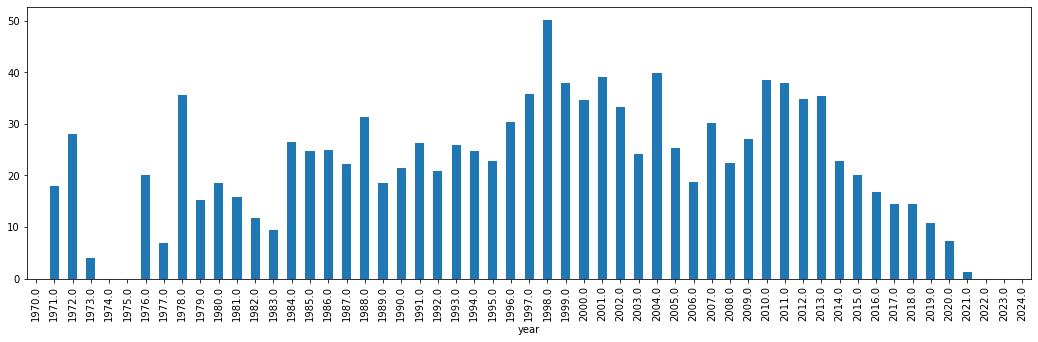

In [54]:
ratings = df.groupby(by='year')['rating_count'].mean()
ratings.plot.bar(figsize=(18,5))
None

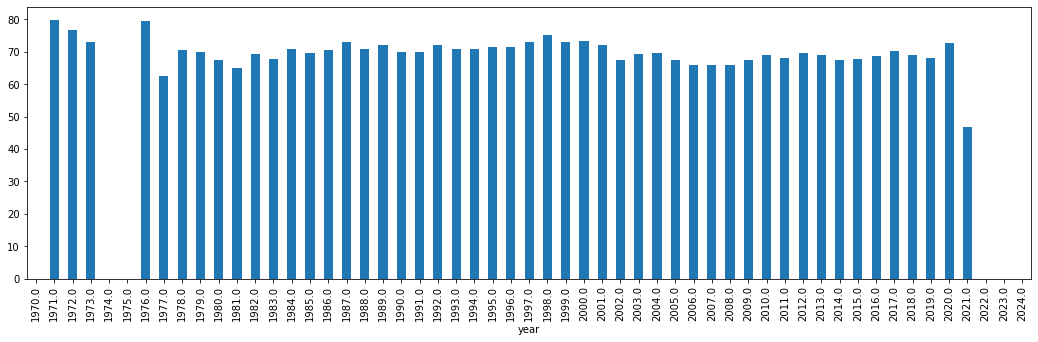

In [55]:
ratings = df.groupby(by='year')['rating'].mean()
ratings.plot.bar(figsize=(18,5))
None

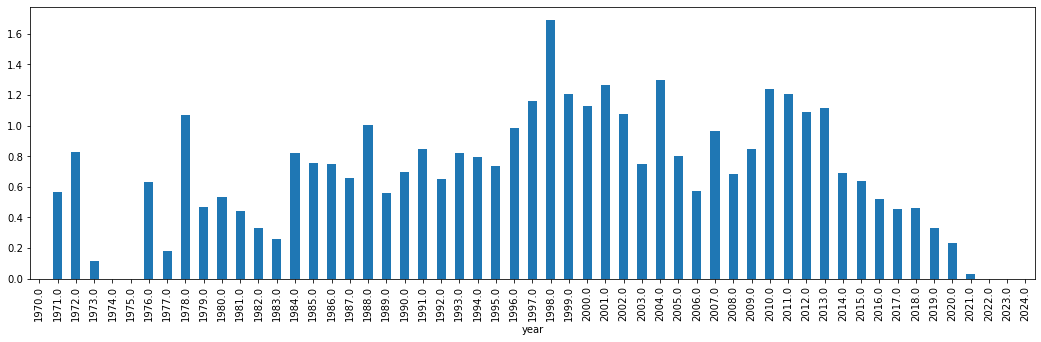

In [56]:
ratings = df.groupby(by='year')['normalized_weighted_score'].mean()
ratings.plot.bar(figsize=(18,5))
None

In [ ]:
# at this point we cannot tell how the ratings vary, we have to look to each platform 

# 4. In which year were released the most games?

In [58]:
most_df = df.groupby(by='year').count().sort_values('id',ascending=False).head()
most_df[['id']]

,id
year,
2017.0,6571
2016.0,4451
2020.0,4443
2018.0,3443
2019.0,3216


# 5. In the last 5 years, which month were released the most games per year, can you guess why?

In [61]:
df_five = df[(df['first_release_date'] >= datetime(2016,1,1)) & (df['first_release_date'] <= datetime(2020,12,31))]

In [62]:
df_five

,id,name,platforms,first_release_date,category,genres,themes,player_perspectives,rating,rating_count,similar_games,total_rating,total_rating_count,url,aggregated_rating,aggregated_rating_count,year,month,weighted_score,normalized_weighted_score
133854,7331.0,Uncharted4:AThief'sEnd,48,2016-05-10,0.0,"5,31","1,17,22",2,92.424968,1248.0,"431,471,512,565,1009,5503,7323,11156,11186",92.795817,1273.0,https://www.igdb.com/games/uncharted-4-a-thief...,93.166667,25.0,2016.0,5.0,115346.360029,45.542396
134338,7346.0,TheLegendofZelda:BreathoftheWild,"41,130",2017-03-03,0.0,"12,31","1,17,38",2,92.156404,1191.0,"359,472,1029,1036,1864,1942,3025,11156,19560",94.874499,1222.0,https://www.igdb.com/games/the-legend-of-zelda...,97.592593,31.0,2017.0,3.0,109758.277678,43.336044
133085,19560.0,GodofWar,48,2018-04-20,0.0,"25,31","1,17,22",2,95.376476,1144.0,"19564,19565,22387,23733,25076,26192,28168,3692...",96.160460,1165.0,https://www.igdb.com/games/god-of-war--1,96.944444,21.0,2018.0,4.0,109110.688332,43.080355
133878,11156.0,HorizonZeroDawn,"6,48",2017-02-28,0.0,"5,12","1,18,38",2,91.690298,989.0,"1877,7349,11208,17379,19564,25076,25300,36198,...",90.268226,1018.0,https://www.igdb.com/games/horizon-zero-dawn,88.846154,29.0,2017.0,2.0,90681.704579,35.804009
81933,7351.0,DOOM,"6,48,49",2016-05-13,0.0,5,"1,18,19,21",1,86.189907,1026.0,"312,533,571,1006,2031,9498,9727,11118,19531",86.579328,1060.0,https://www.igdb.com/games/doom--2,86.968750,34.0,2016.0,5.0,88430.844465,34.915298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79822,132386.0,Nerve,6,2020-12-31,0.0,"32,33",1,1,NaN,NaN,"22799,37419,43367,76263,96217,111130,113360,11...",NaN,NaN,https://www.igdb.com/games/nerve,NaN,NaN,2020.0,12.0,NaN,NaN
54896,116017.0,CyberOps:TacticalHackingSupport,6,2020-12-31,0.0,"13,15,32",1,NaN,NaN,NaN,"25311,26574,31515,35994,37419,51577,65827,7855...",NaN,NaN,https://www.igdb.com/games/cyber-ops-tactical-...,NaN,NaN,2020.0,12.0,NaN,NaN
56561,138048.0,Tinyshot,6,2020-12-31,0.0,"5,33",1,4,NaN,NaN,"27270,43367,103281,103292,103298,103301,105049...",NaN,NaN,https://www.igdb.com/games/tinyshot,NaN,NaN,2020.0,12.0,NaN,NaN
1204,137607.0,Vilset,6,2020-12-31,0.0,13,33,3,NaN,NaN,NaN,NaN,NaN,https://www.igdb.com/games/vilset,NaN,NaN,2020.0,12.0,NaN,NaN


In [78]:
#another way - using isin
years = [2016,2017,2018,2019,2020]
df_five_2 = df[df['year'].isin(years)]
df_five_2.head()

In [65]:
df_year_month = df_five.groupby(['year','month'])['id'].count()
df_year_month

year    month
2016.0  1.0      226
        2.0      244
        3.0      329
        4.0      321
        5.0      278
        6.0      318
        7.0      349
        8.0      389
        9.0      457
        10.0     500
        11.0     432
        12.0     608
2017.0  1.0      368
        2.0      384
        3.0      481
        4.0      424
        5.0      428
        6.0      432
        7.0      593
        8.0      666
        9.0      725
        10.0     706
        11.0     680
        12.0     684
2018.0  1.0      215
        2.0      253
        3.0      311
        4.0      225
        5.0      268
        6.0      234
        7.0      214
        8.0      268
        9.0      286
        10.0     270
        11.0     252
        12.0     647
2019.0  1.0      240
        2.0      245
        3.0      241
        4.0      268
        5.0      254
        6.0      229
        7.0      243
        8.0      272
        9.0      268
        10.0     280
        11.0     351

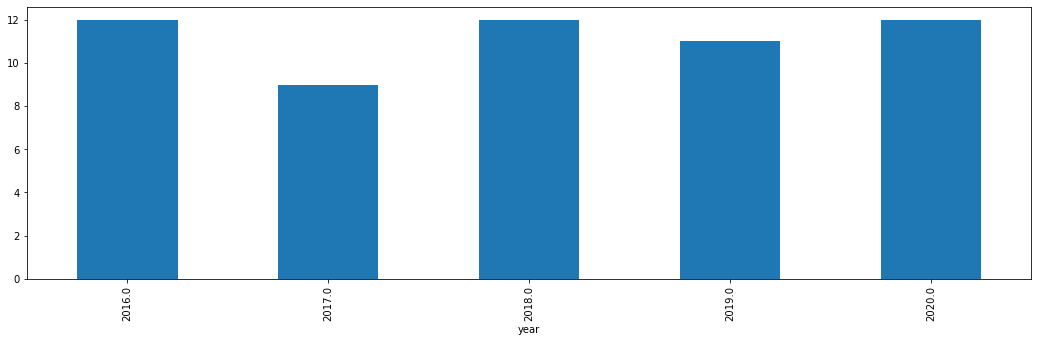

In [67]:
df_year_month.unstack().idxmax(axis=1).plot.bar(figsize=[18,5])
None

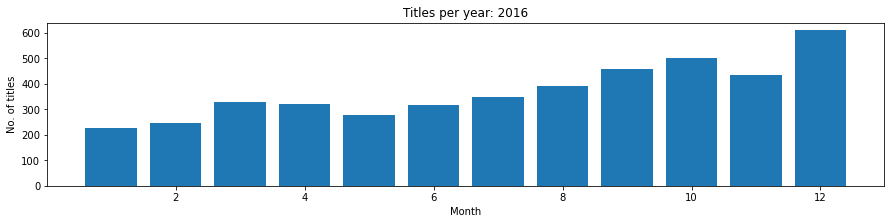

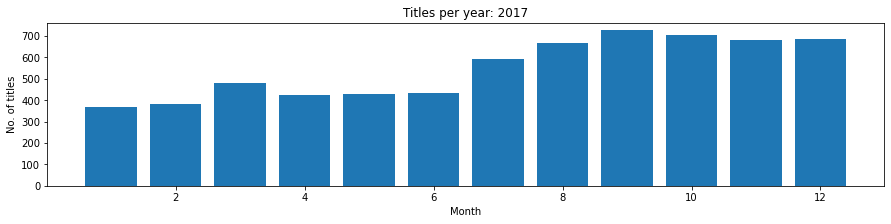

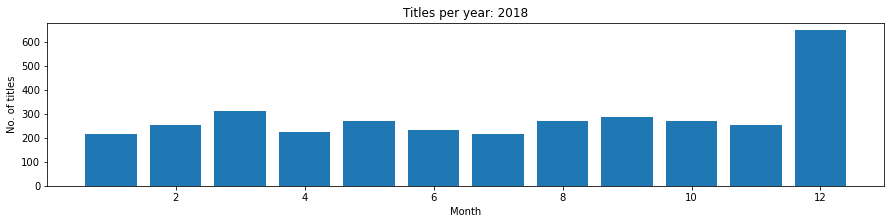

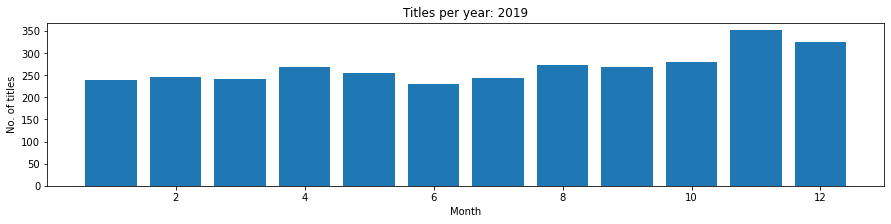

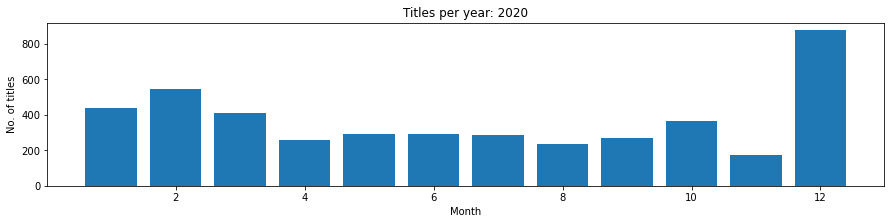

In [68]:
df_releases = df_five.groupby(['year', 'month'])['id'].agg('count').reset_index()
years = [2016, 2017, 2018, 2019, 2020]

for year in years:
    x = df_releases[df_releases['year'] == year]
    plt.figure(figsize=(15,3))
    plt.title('Titles per year: {}'.format(year))
    plt.xlabel('Month')
    plt.ylabel('No. of titles')
    plt.bar(x['month'],x['id'])
    None